In [ ]:
'''
NCC template matching
1. There is an elephant in the room. Can you find it? Search for the template template.png in
the search image search.png using color-based NCC. Assume the origin is in the center of the
template image for each approach (Note: there should be a border around the search image
where the metrics cannot be computed).
2. Sort the resulting scores from best to worst. Plot all of the sorted scores and show the patches
corresponding to the 1st, 2nd, 5th, 10th, 100th, and 500th closest matches. Compare the
results and shortly discuss them.
3. You can not directly call template matching functions. Any other functions are welcome.
4. Submission: 1. Submit your code. 2. Write a report (pdf file), which includes the result
image and your comments, comparison and discussion.
'''

In [11]:
# Importing libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

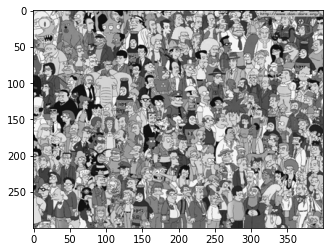

In [23]:
import numpy as np

#Reading the source and sub images
img_c = Image.open('C:/Users/yonghonglin/Documents/python_master/CV_beginner/search.png')
template = Image.open('C:/Users/yonghonglin/Documents/python_master/CV_beginner/template.png').convert('L') #Reading sub image in grey mode
img = img_c.convert('L')

# Convert PIL Images to Numpy arrays for further processing
img = np.array(img)
template = np.array(template)

plt.imshow(img, cmap='gray')


In [24]:
def Normalised_Cross_Correlation(roi, target):
    # Normalised Cross Correlation Equation
    cor=np.sum(roi*target)
    nor = np.sqrt((np.sum(roi**2)))*np.sqrt(np.sum(target**2))
    return cor / nor

In [26]:
def template_matching(img, target):
    # initial parameter
    height,width=img.shape
    tar_height,tar_width=target.shape
    (max_Y,max_X)=(0, 0)
    MaxValue = 0

    # Set image, target and result value matrix
    img=np.array(img, dtype="int")
    target=np.array(target, dtype="int")
    NccValue=np.zeros((height-tar_height,width-tar_width))

    # calculate value using filter-kind operation from top-left to bottom-right
    for y in range(0,height-tar_height):
        for x in range(0,width-tar_width):
            # image roi
            roi=img[y:y+tar_height,x:x+tar_width]
            # calculate ncc value
            NccValue[y,x] = Normalised_Cross_Correlation(roi,target)
            # find the most match area
            if NccValue[y,x]>MaxValue:
                MaxValue=NccValue[y,x]
                (max_Y,max_X) = (y,x)

    return (max_X,max_Y)

In [27]:
# Call the template matching function
top_left_cord=template_matching(img, template)
#Calculating remaining coordinates
top_right_cord=(top_left_cord[0]+template.shape[1]-1,top_left_cord[1])
bottom_left=(top_left_cord[0],top_left_cord[1]+template.shape[0]-1)
bottom_right=(bottom_left[0]+template.shape[1]-1,bottom_left[1])
print(f'coordinates are {top_left_cord},{top_right_cord},{bottom_left},{bottom_right}')

coordinates are (71, 82),(139, 82),(71, 128),(139, 128)


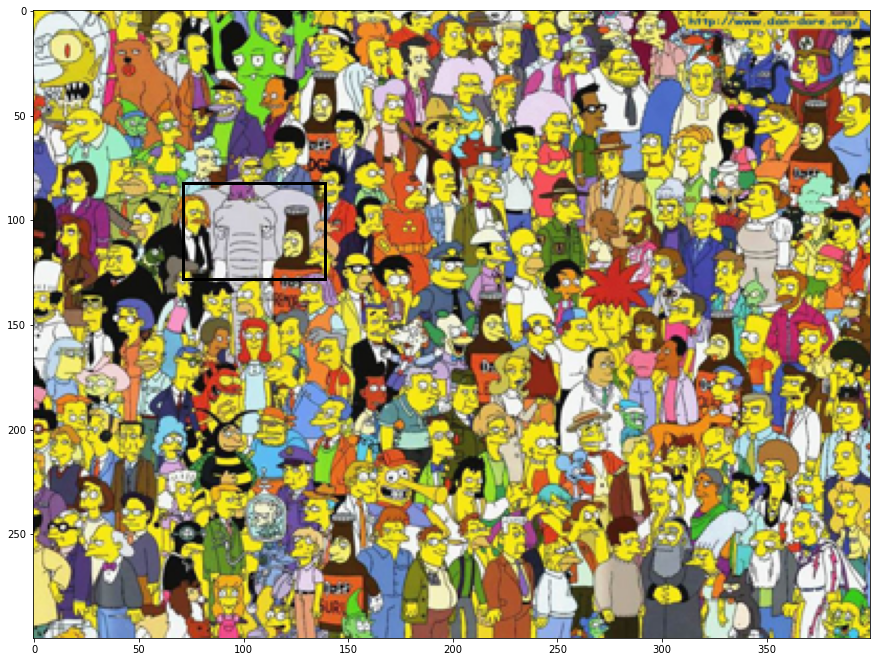

In [28]:
plt.figure(figsize=(15,15))
plt.plot([top_left_cord[0],top_right_cord[0]], [top_left_cord[1],top_right_cord[1]],
         color="black", linewidth=3)
plt.plot([bottom_left[0],bottom_right[0]], [bottom_left[1],bottom_right[1]],
         color="black", linewidth=3)
plt.plot([top_left_cord[0],bottom_left[0]],[top_left_cord[1],bottom_left[1]],
         color='black', linewidth=3)
plt.plot([top_right_cord[0],bottom_right[0]],[top_right_cord[1],bottom_right[1]],
         color='black', linewidth=3)
plt.imshow(img_c)
plt.show()